In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [4]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])


In [5]:
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])


In [6]:
model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=1)

Epoch 1/10
938/938 [==============================] - 106s 110ms/step - loss: 0.1525 - accuracy: 0.9544
Epoch 2/10
938/938 [==============================] - 102s 109ms/step - loss: 0.0630 - accuracy: 0.9808
Epoch 3/10
938/938 [==============================] - 101s 108ms/step - loss: 0.0512 - accuracy: 0.9841
Epoch 4/10
938/938 [==============================] - 101s 108ms/step - loss: 0.0414 - accuracy: 0.9868
Epoch 5/10
938/938 [==============================] - 101s 108ms/step - loss: 0.0435 - accuracy: 0.9865
Epoch 6/10
938/938 [==============================] - 102s 109ms/step - loss: 0.0318 - accuracy: 0.9896
Epoch 7/10
938/938 [==============================] - 102s 109ms/step - loss: 0.0277 - accuracy: 0.9905
Epoch 8/10
938/938 [==============================] - 101s 108ms/step - loss: 0.0249 - accuracy: 0.9922
Epoch 9/10
938/938 [==============================] - 102s 108ms/step - loss: 0.0208 - accuracy: 0.9933
Epoch 10/10
938/938 [==============================] - 102s 109m

In [7]:
_, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 99.03%


In [8]:
path = '/kaggle/input/digit-recognizer/test.csv'
df_test = pd.read_csv(path)
x_test = np.array(df_test).reshape(-1, 28, 28, 1).astype("float32") / 255.0
pred = model.predict(x_test)

875/875 [==============================] - 13s 15ms/step


In [9]:
pred = pred.argmax(axis = 1)

In [10]:
pred

array([2, 0, 9, ..., 3, 9, 2])

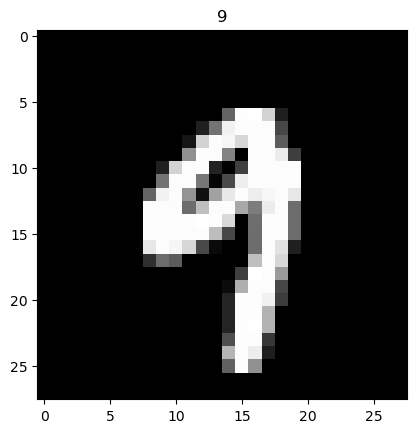

In [11]:
n_image = 27998
img = np.array(df_test.iloc[n_image,:]).reshape(28,28)
plt.imshow(img, cmap = 'gray')
plt.title(pred[n_image])
plt.show()

In [12]:
sub_path = '/kaggle/input/digit-recognizer/sample_submission.csv'
sub = pd.read_csv(sub_path)
output = pd.DataFrame({'ImageId': sub.ImageId, 'Label': pred})

In [13]:
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [14]:
output.to_csv("submission.csv", index = False)

In [15]:
sub_path = '/kaggle/working/submission.csv'
sub = pd.read_csv(sub_path)
sub

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
